# Final Project
- Student name: Joey Husney
- Student pace: Full time
- Instructor: Yish Lim

# Introduction
SyriaTel has decided to up their game in sales and they would like to determine which customers are most likely to stop using their service. We will be going through the dataset they have provided us to determine which customers have a good chance of leaving or staying with them. This information will help them encourage the 'flaky' customers to stay perhaps by providing extra incentives that will allow them to make the 'correct' decision. 
Please note that this is a binary classification problem and we will be using many different tools to assist us in our predictions.

# Importing and inspecting data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
print(df.shape)
print(df.info())

(3333, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-n

# Scrub data

## Filter out necessary columns

In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
df = df[['state', 'account length', 'area code',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']]

In [6]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Change column types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64


> True and false should be numeric columns

In [8]:
df['churn'] = df['churn'].astype(int)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [9]:
def bool_to_num(x):
    if x =='yes':
        return 1
    elif x == 'no':
        return 0
    else:
        return x

In [10]:
df['international plan'] = df['international plan'].apply(bool_to_num)
df['voice mail plan'] = df['voice mail plan'].apply(bool_to_num)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Check that data is accurate

In [11]:
df.isna().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [12]:
df.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [13]:
df.drop(['area code', 'account length'], axis=1, inplace=True)
df.head()

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Explore

## Preliminary investigation of churn column

In [14]:
# Is the churn rate evenly distributed?
df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

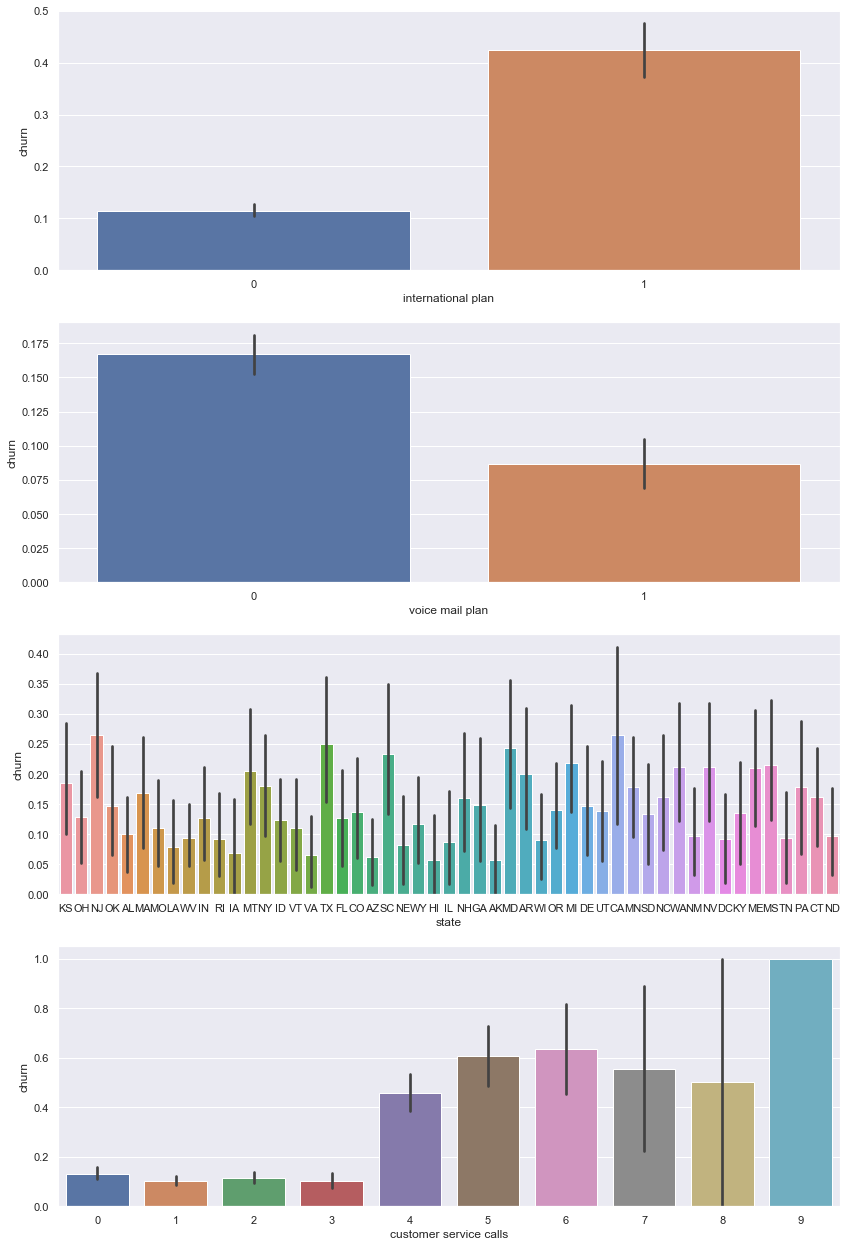

In [15]:

fix, ax = plt.subplots(4,1,figsize=(14,22))
ax1 = sns.barplot(data=df, y='churn', x='international plan', ax=ax[0])
ax2 = sns.barplot(data=df, y='churn', x='voice mail plan',ax=ax[1])
ax3 = sns.barplot(data=df, y='churn', x='state', ax=ax[2])
ax4 = sns.barplot(data=df, y='churn', x='customer service calls', ax=ax[3])

In [16]:
df['customer service calls'].value_counts(normalize=True)

1    0.354335
2    0.227723
0    0.209121
3    0.128713
4    0.049805
5    0.019802
6    0.006601
7    0.002700
9    0.000600
8    0.000600
Name: customer service calls, dtype: float64

### Observations:
* Seems like people with an international plan are more likely to leave service
* Voice mail plan not so important in determining churn rate
* High causality between customer service calls and leaving service. This may suggest that customer service isn't great.
* California has high churn rate, must be further investigated what is causing customers to leave in CA

In [17]:
# Bin total day calls, total eve calls, and total night calls
df_binned = df.copy()
day_calls_binned = pd.cut(df_binned['total day calls'], bins=[0,25,50,75,100,125,150,175,200], 
              labels=['0-25', '25-50','50-75','75-100','100-125','125-150','150-175','175-200'])
eve_calls_binned = pd.cut(df_binned['total eve calls'], bins=[0,25,50,75,100,125,150,175,200], 
              labels=['0-25', '25-50','50-75','75-100','100-125','125-150','150-175','175-200'])
night_calls_binned = pd.cut(df_binned['total night calls'], bins=[0,25,50,75,100,125,150,175,200], 
              labels=['0-25', '25-50','50-75','75-100','100-125','125-150','150-175','175-200'])

df_binned['total_day_calls_binned'] = day_calls_binned
df_binned['total_eve_calls_binned'] = eve_calls_binned
df_binned['total_night_calls_binned'] = night_calls_binned

In [18]:
# Bin total day minutes, total eve minutes, and total night minutes

day_min_binned = pd.cut(df_binned['total day minutes'], bins=[0,25,50,75,100,125,150,175,200,225,250,275,300,500], 
              labels=['0-25', '25-50','50-75','75-100','100-125','125-150','150-175','175-200', '200-225', '225-250','250-275','275-300','300+'])
eve_min_binned = pd.cut(df_binned['total eve minutes'], bins=[0,25,50,75,100,125,150,175,200,225,250,275,300,500], 
              labels=['0-25', '25-50','50-75','75-100','100-125','125-150','150-175','175-200', '200-225', '225-250','250-275','275-300','300+'])
night_min_binned = pd.cut(df_binned['total night minutes'], bins=[0,25,50,75,100,125,150,175,200,225,250,275,300,500], 
              labels=['0-25', '25-50','50-75','75-100','100-125','125-150','150-175','175-200', '200-225', '225-250','250-275','275-300','300+'])

df_binned['total_day_minutes_binned'] = day_min_binned
df_binned['total_eve_minutes_binned'] = eve_min_binned
df_binned['total_night_minutes_binned'] = night_min_binned

In [19]:
# Ensure accuracy of binning
df_binned[['total day calls', 'total_day_calls_binned']].sort_values(by=['total_day_calls_binned', 'total day calls']).head(25)

,total day calls,total_day_calls_binned
1144,30,25-50
1989,35,25-50
692,36,25-50
740,40,25-50
3187,40,25-50
1322,42,25-50
2217,42,25-50
2884,44,25-50
2885,44,25-50
2964,44,25-50


In [20]:
df_binned.head()

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total intl calls,total intl charge,customer service calls,churn,total_day_calls_binned,total_eve_calls_binned,total_night_calls_binned,total_day_minutes_binned,total_eve_minutes_binned,total_night_minutes_binned
0,KS,0,1,25,265.1,110,45.07,197.4,99,16.78,...,3,2.70,1,0,100-125,75-100,75-100,250-275,175-200,225-250
1,OH,0,1,26,161.6,123,27.47,195.5,103,16.62,...,3,3.70,1,0,100-125,100-125,100-125,150-175,175-200,250-275
2,NJ,0,0,0,243.4,114,41.38,121.2,110,10.30,...,5,3.29,0,0,100-125,100-125,100-125,225-250,100-125,150-175
3,OH,1,0,0,299.4,71,50.90,61.9,88,5.26,...,7,1.78,2,0,50-75,75-100,75-100,275-300,50-75,175-200
4,OK,1,0,0,166.7,113,28.34,148.3,122,12.61,...,3,2.73,3,0,100-125,100-125,100-125,150-175,125-150,175-200


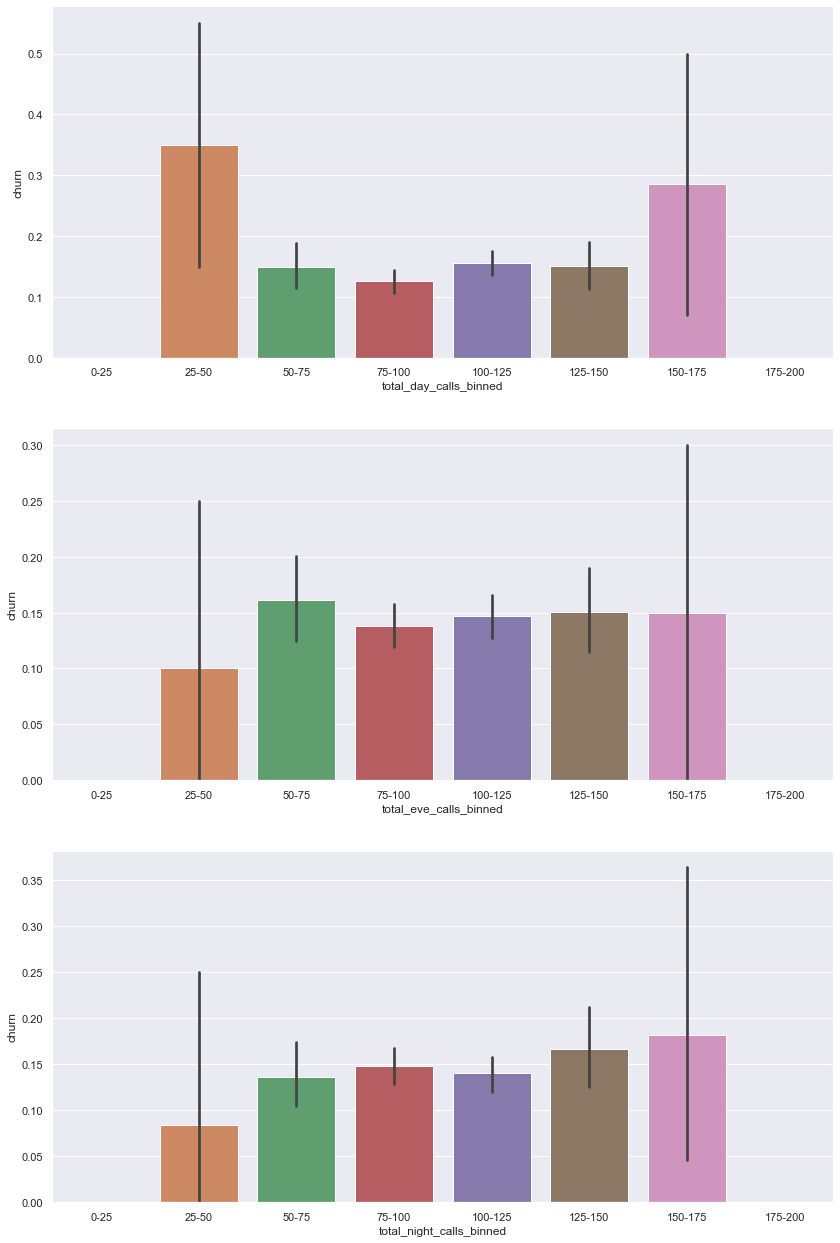

In [21]:
fix, ax = plt.subplots(3,1,figsize=(14,22))
ax1 = sns.barplot(data=df_binned, y='churn', x='total_day_calls_binned', ax=ax[0])
ax2 = sns.barplot(data=df_binned, y='churn', x='total_eve_calls_binned',ax=ax[1])
ax3 = sns.barplot(data=df_binned, y='churn', x='total_night_calls_binned', ax=ax[2])

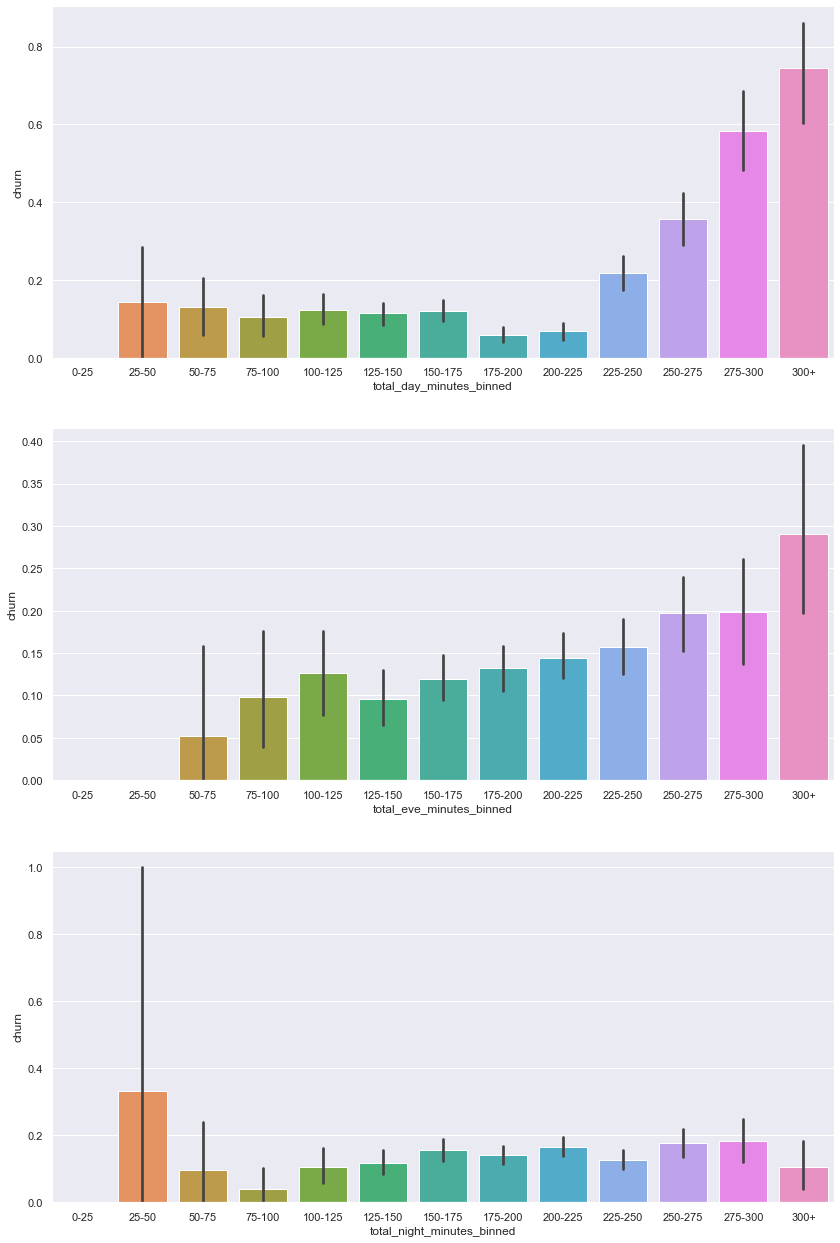

In [22]:
fix, ax = plt.subplots(3,1,figsize=(14,22))
ax1 = sns.barplot(data=df_binned, y='churn', x='total_day_minutes_binned', ax=ax[0])
ax2 = sns.barplot(data=df_binned, y='churn', x='total_eve_minutes_binned',ax=ax[1])
ax3 = sns.barplot(data=df_binned, y='churn', x='total_night_minutes_binned', ax=ax[2])

### Observations:
* Low day calls has high churn rate of approximately 35%
* High night calls has high churn rate of approximately 18%
* Low evening calls seems to have low churn rate
* As minutes spent on phone go up, the churn rate goes way up with the exception of night minutes which seems to have little correlation
> Not sure if any of this is just correlation or causation

# Preprocessing data

## Clean up column names

In [23]:
sub = [(' ', '_')]

def col_formatting(col):
    '''Replacing Column Features for Model Processing'''
    for old, new in sub:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

In [24]:
df.head()

,state,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Check for multicollinearity 

In [25]:
def check_multicol(df):
    
    corr = df.corr().abs()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, cmap=cmap,mask=mask,  vmax=.75, center=0, annot=True)
    
plt.rcParams['figure.figsize'] = (20,15)
check_multicol(df)

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
pip install seaborn==1.10.0

In [ ]:
# drop some more features that exibit multicollinearity
# Drop charge columns because no need for them and they correlate highly with charge collumns
df.drop(['total_intl_charge', 'total_night_charge', 'total_eve_charge', 'total_day_charge', 'number_vmail_messages'], axis=1, inplace=True)
df.head()

In [ ]:
check_multicol(df)

## One hot encoding

In [ ]:
state_dummies = pd.get_dummies(df['state'], prefix='state', drop_first=True)
df = pd.concat([df, state_dummies], axis=1)
df.head()

In [ ]:
df.drop(['state'], axis=1, inplace=True)

# Modeling

## Compare Random Forest Model with and without SMOTE

## Before SMOTE

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(['churn'], axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [32]:
y_train

367     0
3103    0
549     0
2531    0
2378    0
       ..
1095    0
1130    0
1294    0
860     0
3174    0
Name: churn, Length: 2499, dtype: int32

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.5f}\nRecall = {recall_score(y_test, preds):.5f}\n'f'Precision = {precision_score(y_test, preds):.5f}\n'f'f1 score = {f1_score(y_test, preds):.5f}')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'MD'

> As you can see, the precision is a perfect 1. This is due to being way to careful when to say that a customer will churn. The recall metric shows that out of all the true positives, it predicted positive just a bit more than half of the time which is pretty terrible. This is most likely due to the class imbalance problem.

## After SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.5f}\nRecall = {recall_score(y_test, preds):.5f}\n'f'Precision = {precision_score(y_test, preds):.5f}\n'f'f1 score = {f1_score(y_test, preds):.5f}')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

> Seems pretty good, all metrics above 90%. Hope it's not too good to be true

## Modeling with Pycaret

In [ ]:
import pycaret
from pycaret.datasets import get_data
from pycaret.classification import *

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
testpycar = setup(data = df, target = 'churn', numeric_features = ['total_intl_minutes', 'total_intl_calls', 'customer_service_calls', 'total_day_minutes'], fix_imbalance=True, normalize=True, n_jobs=-1, feature_ratio=False, use_gpu=True)

In [ ]:
compare_models()

> Going with Light Gradient Boosting Machine due to high f1 score which takes into account both precision and recall scores in a very intuitive way

In [ ]:
lightgbm = create_model('lightgbm')

In [ ]:
tuned_lightgbm = tune_model(lightgbm, optimize = 'AUC')

In [ ]:
predict_model(tuned_lightgbm)

## SHAP - Feature importance

In [ ]:
interpret_model(tuned_lightgbm)

# Conclusions and recommendations

* SyriaTel should give incentives to those customers making higher customer service calls as this was the top indicator that a customer would churn
* Another idea would be to increase the quality of these calls in order to retain these customers
* Minutes spend on the phone during the daytime is an indicator that a customer may leave. SyriaTel should consider lowering prices for customers who fit into this category
* The international call system must be further investigated as people who are making these calls are likely to churn. One suggestion would be to lower prices. Another suggestion would be to increase the quality of these calls.

# Future work

* See why international calling customers are leaving so fast as seen in bar chart above
* Try to understand how number of minutes on phone during daytime is causing the churn rate to increase significantly
* Get more specific information on our clients and see if that can help us better predict whether they are more or less likely to churn. Ex: Marital status, income, etc